## Finding out statistics of a Whatsapp group using the data exported from the app

In [196]:
# Initializing stuff
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 20)
pd.set_option('display.max_rows', 25)

file_name = "ignore_dir/whatsapp_stats.json"
all_data_df = pd.read_json(file_name)

In [197]:
# Getting only the chat data, not the notif/message etc.
chat_df = all_data_df[all_data_df['dialog_type'] == 'default']
del chat_df['dialog_type']

## Finding out who talks the most

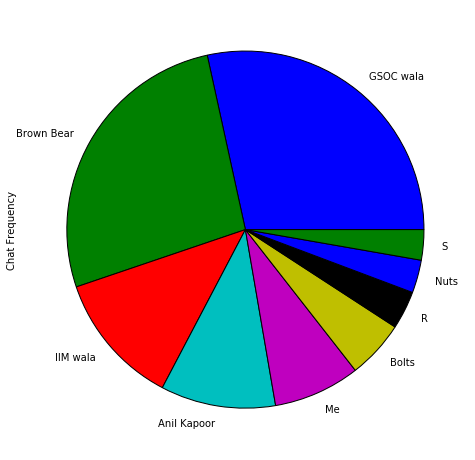

In [198]:
# Find the total number of chats per person
num_chat_df = chat_df.groupby(['author'])[['dialog']] \
    .count() \
    .sort_values('dialog', ascending=False) \
    .rename(columns={'dialog':'Number of Chats'})

pd.Series(
    num_chat_df['Number of Chats'].tolist(), 
    index=num_chat_df.index.tolist(),
    name="Chat Frequency"
).plot.pie(figsize=(8, 8))

## Finding out the time when the group is the most active

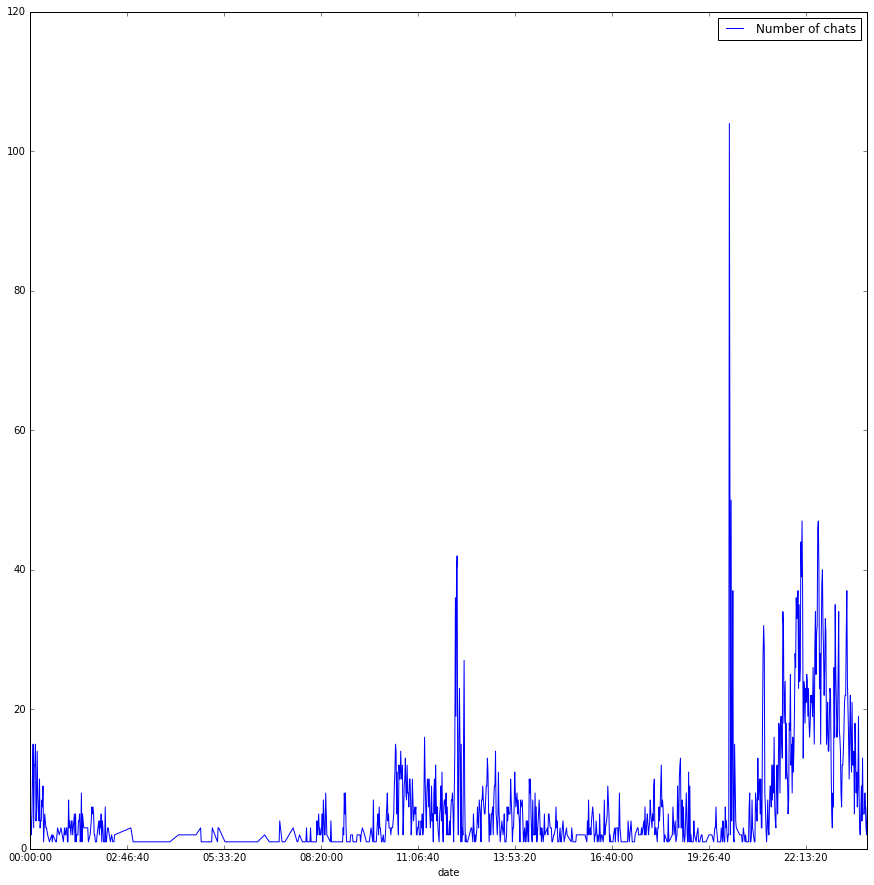

In [199]:
# Plotting the timeline for chats
from datetime import datetime
timeline_df = chat_df.copy()

timeline_df['date'] = timeline_df['date'].apply(datetime.time)
del timeline_df['dialog']

time_range = timeline_df.groupby(['date'])[['date']].count().rename(columns={'date': 'Number of chats'})
time_range.plot(figsize=(15, 15))

## The person sharing the most number of Media items

In [200]:
# The person sharing the most number of Media Items
chat_df[chat_df["dialog"] == "<Media omitted>"] \
    .groupby(['author']) \
    .count()[['dialog']] \
    .sort_values('dialog', ascending=False) \
    .rename(columns={'dialog' : 'Number of Media shared'}) \
    .reset_index()

,author,Number of Media shared
0,R,21
1,IIM wala,17
2,Me,13
3,GSOC wala,12
4,S,12
5,Brown Bear,11
6,Anil Kapoor,10
7,Bolts,10
8,Nuts,2


## The most used words in the group

In [201]:
# Most frequently used words in the group (3 chars or more)
bag_of_words = " ".join(chat_df[chat_df["dialog"] != "<Media omitted>"]["dialog"].tolist())
shaved_words = map(
    lambda x:x.strip(" .,!").lower(),
        filter(
            lambda x:len(x)>3, 
            bag_of_words.split()
        )
    )
# TODO: Removal of stop words(Esp in hindi), but not needed.
freq_ser = pd.Series(shaved_words).value_counts()
pd.DataFrame({"words" : freq_ser.index, "freq" : freq_ser.values}).head(15)

,freq,words
0,533,nahi
1,428,hai
2,291,bhai
3,213,mein
4,209,raha
5,206,haan
6,155,gaya
7,140,nithin
8,131,hoga
9,114,aadi


## Person using the most number of Emojis

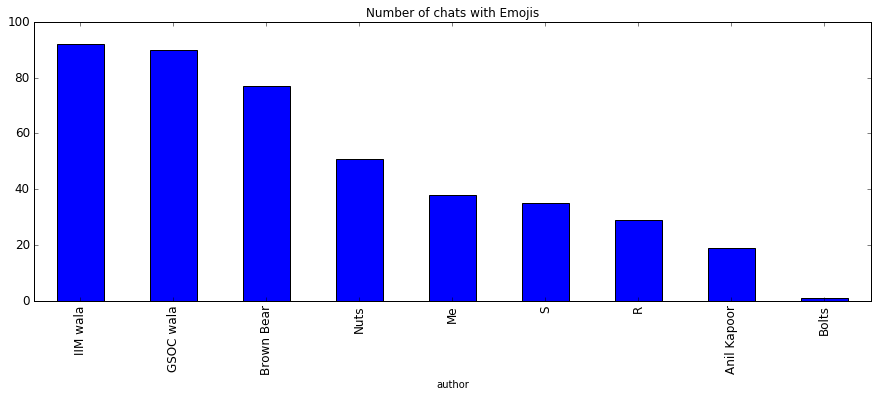

In [202]:
# Person frequently speaking with the emoji
import re

chat_df[chat_df['dialog'].str.match(u'[\U0001f600-\U0001f650]')][['author', 'dialog']] \
    .groupby(['author']) \
    .count() \
    .sort_values('dialog',ascending=False) \
    .rename({'dialog' : 'Number of chats with Emoji'}) \
    .plot(
        kind="Bar",
        title ="Number of chats with Emojis",
        figsize=(15,5),
        legend=False, 
        fontsize=12
    )

## Find out the person uttering the most curse words - Hindi and English

In [203]:
file_name = "ignore_dir/gaalis.txt"
with open(file_name) as fp:
    file_contents = fp.read().strip()

# Cleaning the stuff up
curses = map(
    lambda x:x.strip(),
    [l for l in file_contents.split(" ") if len(l) > 3]
)
curses = list(set(curses))

chat_df[chat_df["dialog"].str.match("(?:%s)" % "|".join(curses))] \
    .groupby(["author"]).count()[['dialog']] \
    .rename(columns={"dialog" : "Number of abuses"}) \
    .reset_index() \
    .sort_values("Number of abuses", ascending=False)

,author,Number of abuses
2,R,4
0,Anil Kapoor,1
1,Me,1
